In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train = X_train.reshape(-1, 28, 28, 1).astype(np.float32)
X_test = X_test.reshape(-1, 28, 28, 1).astype(np.float32)

In [5]:
X_train = X_train / 255
X_test = X_test / 255

In [6]:
y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [8]:
model = Sequential([
    Conv2D(filters=16, kernel_size=(5, 5), padding="same", input_shape=(28, 28, 1), activation="relu"),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=36, kernel_size=(5, 5), padding="same", activation="relu"),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])

In [9]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [10]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
train_history = model.fit(X_train, y_train_onehot, validation_split=0.2, epochs=10, batch_size=300, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 11s - loss: 0.4674 - accuracy: 0.8540 - val_loss: 0.0999 - val_accuracy: 0.9697
Epoch 2/10
 - 11s - loss: 0.1331 - accuracy: 0.9605 - val_loss: 0.0657 - val_accuracy: 0.9809
Epoch 3/10
 - 11s - loss: 0.1006 - accuracy: 0.9691 - val_loss: 0.0552 - val_accuracy: 0.9845
Epoch 4/10
 - 11s - loss: 0.0808 - accuracy: 0.9759 - val_loss: 0.0487 - val_accuracy: 0.9855
Epoch 5/10
 - 11s - loss: 0.0711 - accuracy: 0.9779 - val_loss: 0.0431 - val_accuracy: 0.9872
Epoch 6/10
 - 11s - loss: 0.0637 - accuracy: 0.9811 - val_loss: 0.0421 - val_accuracy: 0.9879
Epoch 7/10
 - 11s - loss: 0.0541 - accuracy: 0.9832 - val_loss: 0.0373 - val_accuracy: 0.9894
Epoch 8/10
 - 11s - loss: 0.0505 - accuracy: 0.9847 - val_loss: 0.0368 - val_accuracy: 0.9900
Epoch 9/10
 - 11s - loss: 0.0465 - accuracy: 0.9858 - val_loss: 0.0357 - val_accuracy: 0.9907
Epoch 10/10
 - 11s - loss: 0.0431 - accuracy: 0.9869 - val_loss: 0.0322 - val_accuracy: 0.9921


In [12]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train], label="train")
    plt.plot(train_history.history[validation], label="validation")
    plt.title("Train History")
    plt.xlabel("epoch")
    plt.ylabel(train)
    plt.legend(loc="upper left")
    plt.show()

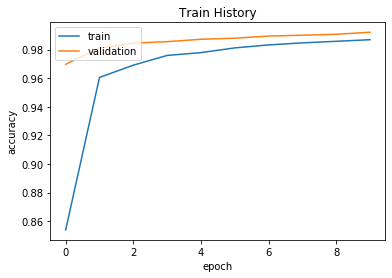

In [13]:
show_train_history(train_history, "accuracy", "val_accuracy")

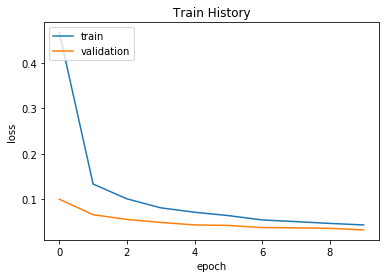

In [14]:
show_train_history(train_history, "loss", "val_loss")

In [17]:
loss, accuracy = model.evaluate(X_test, y_test_onehot)
print(accuracy)

10000/10000 [==============================] - 1s 68us/step
0.9918000102043152


In [18]:
y_predict = model.predict_classes(X_test)

In [19]:
import pandas as pd
pd.crosstab(y_test, y_predict, rownames=["label"], colnames=["predict"])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,0,0,0,0,0,0,1,2,0
1,0,1129,1,0,0,1,1,1,2,0
2,3,0,1027,0,0,0,0,1,1,0
3,0,0,2,1002,0,2,0,1,3,0
4,0,0,0,0,977,0,1,0,1,3
5,1,0,1,3,0,882,4,0,0,1
6,5,2,0,0,1,1,949,0,0,0
7,0,2,6,1,0,0,0,1016,1,2
8,3,0,0,1,0,0,0,0,969,1
